<a href="https://colab.research.google.com/github/alikhan171997/House_price_prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import dependenses

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df = pd.read_csv(r"/content/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,5
age,0
dis,0
rad,0
tax,0


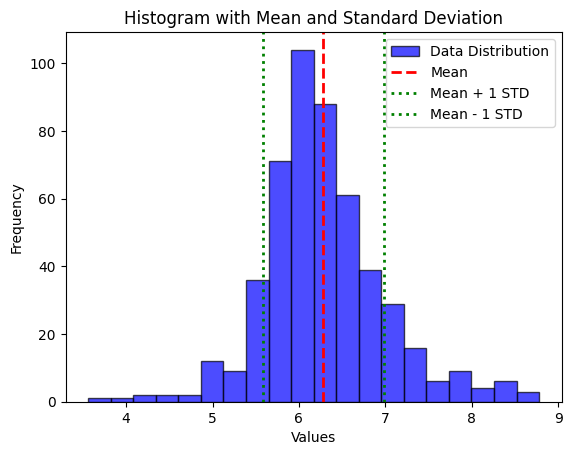

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example Data
data = df['rm']

# Calculate mean and standard deviation
mean_val = data.mean()
std_val = data.std()

# Plot histogram
plt.hist(data, bins=20, alpha=0.7, color='blue', edgecolor='black', label='Data Distribution')

# Overlay mean and standard deviation lines
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_val + std_val, color='green', linestyle='dotted', linewidth=2, label='Mean + 1 STD')
plt.axvline(mean_val - std_val, color='green', linestyle='dotted', linewidth=2, label='Mean - 1 STD')

# Add labels and legend
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with Mean and Standard Deviation')
plt.legend()
plt.show()


In [ ]:
mean_val = df['rm'].mean()

In [ ]:
df['rm'] = df['rm'].fillna(mean_val)


In [ ]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702085,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
correlation = df.corr()

<Axes: >

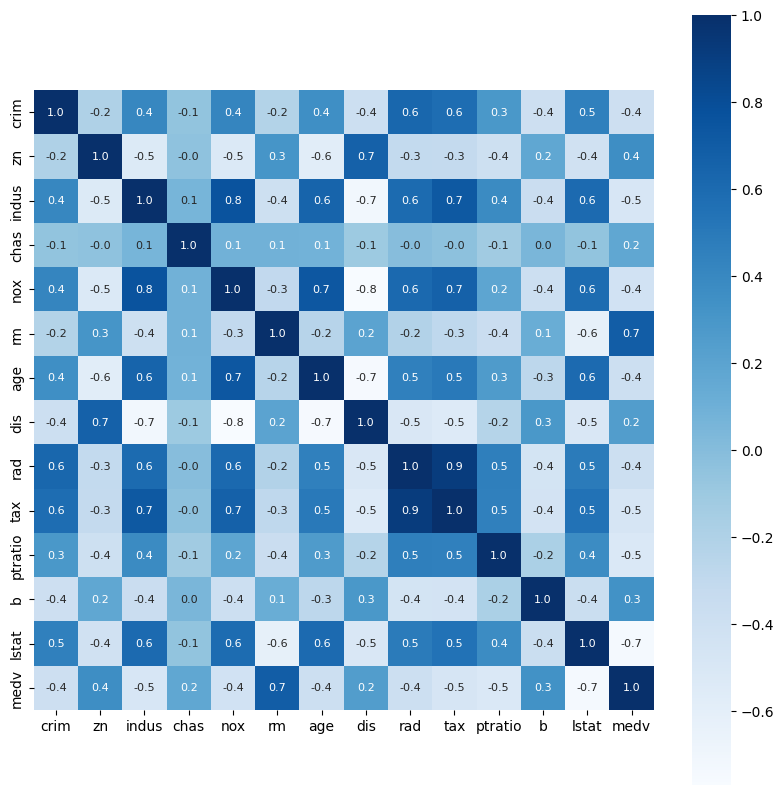

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

In [ ]:
x = df.drop(['medv'], axis = 1)
y = df['medv']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(506, 13) (404, 13) (102, 13)


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
!pip install scikit-learn==1.5.0


In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

evaluating the model


In [ ]:
our_prediction_x_train = model.predict(x_train)
print(our_prediction_x_train)

[23.145035  20.99829   20.101328  34.68559   13.92113   13.502976
 21.998634  15.196165  10.895552  22.70125   13.816369   5.602346
 29.801153  49.997444  34.89932   20.607712  23.392748  19.203741
 32.70026   19.605387  27.000076   8.399246  45.99382   21.717514
 27.084356  19.367146  19.296314  24.795887  22.602285  31.721561
 18.535913   8.703028  17.407063  23.701065  13.292476  10.500767
 12.698425  24.999605  19.686228  14.905453  24.207632  24.989017
 14.899513  17.001928  15.594324  12.693753  24.504936  15.006084
 50.000183  17.502975  21.200136  32.00335   15.601993  22.911354
 19.308453  18.706808  23.285116  37.217976  30.106747  33.107647
 20.997746  49.999733  13.393992   5.0047398 16.502813   8.399988
 28.67882   19.497662  20.586506  45.40149   39.801987  33.40056
 19.827284  33.399197  25.279093  49.998634  12.514675  17.422585
 18.608664  22.593786  50.01019   23.792648  23.306147  23.109524
 41.716736  16.114378  31.601406  36.095917   7.003745  20.39047
 19.990414  

In [ ]:
accuaracy_r =metrics.r2_score(y_train, our_prediction)

accuaracy_m =metrics.mean_absolute_error(y_train, our_prediction)

print(accuaracy_r, accuaracy_m)

In [ ]:
test_data_prediction = model.predict(x_test)
print(test_data_prediction)

[21.519613  21.560959  31.1281    30.045494   9.705714  12.670714
 25.932129  27.219246  24.823372  19.875359  26.424337  25.212265
 21.132597  19.463915  12.779512  24.317833  18.248558  10.49228
  8.827179  14.216042  22.75543   20.434261  36.118538  18.896748
 15.508121  18.539284  46.308327  32.45442   34.116047  19.925184
 17.40219   20.043802  31.182392  24.868607  12.4741    18.610739
 10.377894  21.812876  21.611298  21.785212  26.83357   11.444153
 27.561445   8.506484  21.56113   13.068953  35.13763   14.464186
 32.767487  16.260252  30.87384   25.994925   6.2605853 33.393314
 26.096252  20.340899  19.367838  19.701601  16.508757  23.04706
 21.659065  21.260511  19.127499  29.584187  33.983345  26.270603
 49.571392  27.17152    8.915171  23.946426  16.675037   9.065647
 15.089674  18.354269  27.501093  24.005129  21.670416  21.044445
 19.500874  24.1513    33.950905  19.090425  20.986032  31.764696
 48.47554   36.62047   17.170095  24.199274  28.572525  20.773302
 20.408092  

In [ ]:
score_test_data_r2 = metrics.r2_score(y_test, test_data_prediction)

score_test_mas = metrics.mean_absolute_error(y_test, test_data_prediction)

print(score_test_data_r2, score_test_mas)

0.9086914968243068 2.058270358104332


visualization of test data actual and predicted prices

Text(0.5, 1.0, 'actual prices vs predicted prices')

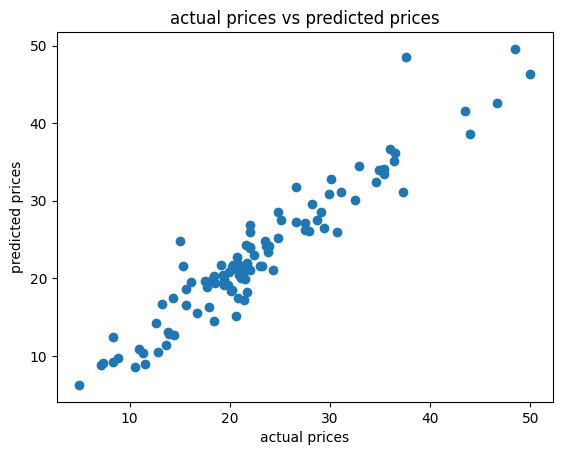

In [ ]:
 plt.scatter(y_test, test_data_prediction)
 plt.xlabel("actual prices")
 plt.ylabel("predicted prices")
 plt.title("actual prices vs predicted prices")

Text(0.5, 1.0, 'actual prices vs predicted prices')

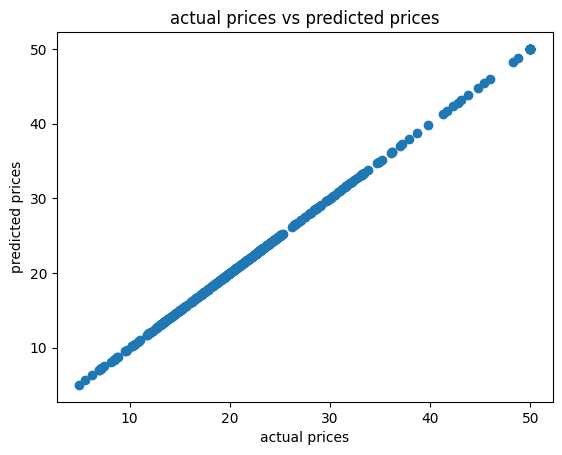

In [ ]:
 plt.scatter(y_train, our_prediction_x_train)
 plt.xlabel("actual prices")
 plt.ylabel("predicted prices")
 plt.title("actual prices vs predicted prices")